In [3]:
from os import path
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cobra import Metabolite, Model, Reaction
from cobra.sampling import sample
from equilibrator_api import Q_, ureg

import sys
sys.path.append(path.expanduser("~/git/flux-components/src"))

from flux_components.settings import (ureg, Q_, ComponentContribution, Reaction, ccache, R, default_T, RESULT_DIR)
from flux_components.biomass_composition import BiomassComposition
from flux_components.flux_sampler import FluxSampler
fsampler = FluxSampler()

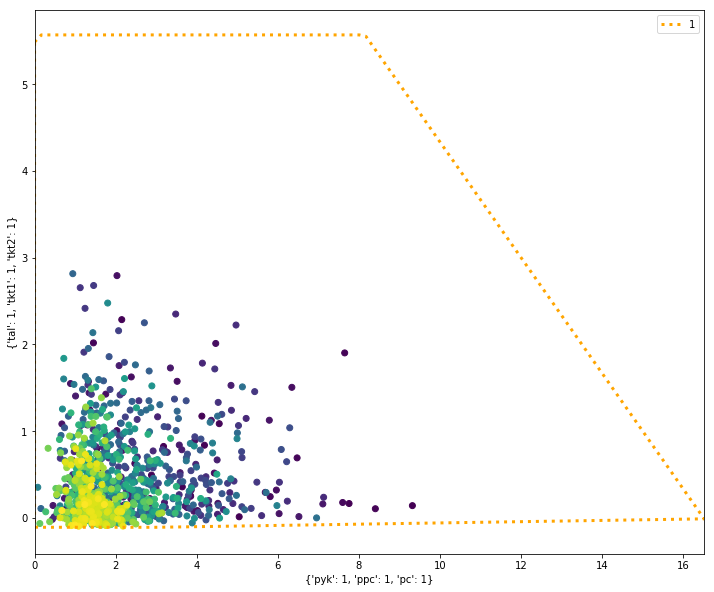

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
xdir = pd.Series(index=['pyk', 'ppc', 'pc'], data=[1, 1, 1])
ydir = pd.Series(index=['tal', 'tkt1', 'tkt2'], data=[1, 1, 1])

ppp = fsampler.phenotypic_phase_plane(xdir, ydir)
ppp.plot(x=0, y=1, style=':', color='orange', linewidth=3, ax=ax)

fsampler.set_biomass_range(Q_("0.02 1/hour"), Q_("0.1 1/hour"))
f_smpl = fsampler.multisample(100, 10)
ax.scatter(f_smpl[xdir.index].dot(xdir), f_smpl[ydir.index].dot(ydir),
           c=f_smpl['biomass'])
ax.set_xlabel(str(xdir.to_dict()))
ax.set_ylabel(str(ydir.to_dict()))
fig.savefig(path.join(RESULT_DIR, "sampling_example.pdf"))